<a href="https://colab.research.google.com/github/cristinarainich/DDCS/blob/main/Results_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set()

In [15]:
# PUT THE VALUES BELOW
# Group, session, RANletters Acc 1, RANletters Acc 2, RANletters RT 1, RANletters RT 2, RANnumbers Acc 1, RANnumbers Acc 2, RANnumbers RT 1, RANnumbers RT 2
raw1 = ['TD', 1, 0, 0, 18, 17, 1, 0, 15, 13]
raw2 = ['TD', 2, 0, 0, 21, 20, 0, 0, 17, 18]
raw3 = ['DD', 1, 1, 1, 21, 25, 2, 0, 22, 21]
raw4 = ['DD', 2, 2, 1, 19, 18, 2, 0, 21, 19]

rows = []
rows.append(raw1)
rows.append(raw2)
rows.append(raw3)
rows.append(raw4)
column_names = ['Subject', 'Session', 'RANL ACC 1', 'RANL ACC 2', 'RANL RT 1', 'RANL RT 2', 'RANN ACC 1', 'RANN ACC 2', 'RANN RT 1', 'RANN RT 2']

In [16]:
df = pd.DataFrame(rows, columns=column_names)

In [18]:
df['AccL'] = df[['RANL ACC 1', 'RANL ACC 2']].mean(axis=1) *
df['AccN'] = df[['RANN ACC 1', 'RANN ACC 2']].mean(axis=1) *
df['RT L'] = df[['RANL RT 1', 'RANL RT 2']].mean(axis=1)
df['RT N'] = df[['RANN RT 1', 'RANN RT 1']].mean(axis=1)

In [28]:
df

,Subject,Session,RANL ACC 1,RANL ACC 2,RANL RT 1,RANL RT 2,RANN ACC 1,RANN ACC 2,RANN RT 1,RANN RT 2,AccL,AccN,RT L,RT N
0,TD,1,0,0,18,17,1,0,15,13,0.0,0.5,17.5,15.0
1,TD,2,0,0,21,20,0,0,17,18,0.0,0.0,20.5,17.0
2,DD,1,1,1,21,25,2,0,22,21,1.0,1.0,23.0,22.0
3,DD,2,2,1,19,18,2,0,21,19,1.5,1.0,18.5,21.0


In [22]:
df[['Subject', 'Session', 'AccL', 'AccN', 'RT L', 'RT N']]

,Subject,Session,AccL,AccN,RT L,RT N
0,TD,1,0.0,0.5,17.5,15.0
1,TD,2,0.0,0.0,20.5,17.0
2,DD,1,1.0,1.0,23.0,22.0
3,DD,2,1.5,1.0,18.5,21.0


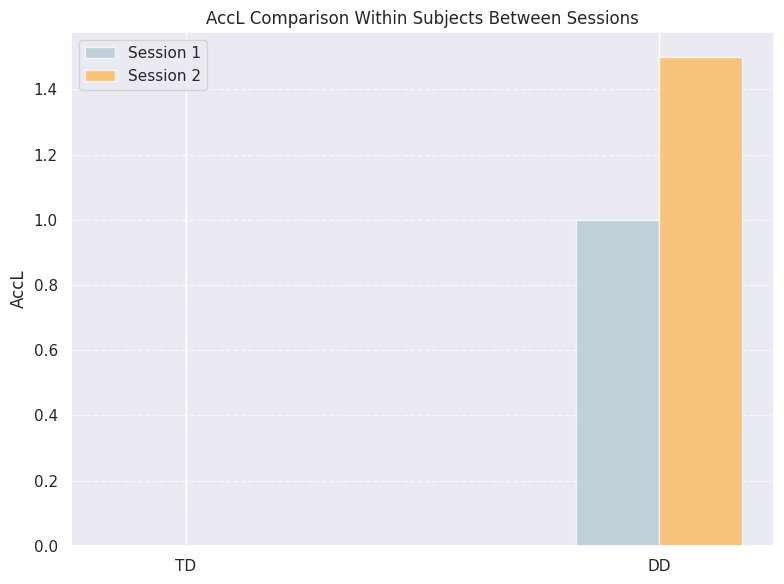

In [27]:
bar_width = 0.35
positions = list(range(len(df['Subject'].unique()) * 2)) # Twice the number of subjects for two sessions

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

pastel_blue = '#AEC6CF'
pastel_orange = '#FFB347'
# Plot data for AccL for each subject and session
subjects = df['Subject'].unique()
for i, subject in enumerate(subjects):
    session1_value = df[(df['Subject'] == subject) & (df['Session'] == 1)]['AccL'].values[0]
    session2_value = df[(df['Subject'] == subject) & (df['Session'] == 2)]['AccL'].values[0]

    # Plotting session values with different colors for different sessions
    ax.bar(i * 2 - bar_width/2, session1_value, bar_width, alpha=0.7, label=f'Session 1' if i == 0 else "", color=pastel_blue)
    ax.bar(i * 2 + bar_width/2, session2_value, bar_width, alpha=0.7, label=f'Session 2' if i == 0 else "", color=pastel_orange)

# Setting the y-axis label and the title
ax.set_ylabel('AccL')
ax.set_title('AccL Comparison Within Subjects Between Sessions')

# Setting the position of the x ticks
ax.set_xticks([i * 2 for i in range(len(subjects))])
ax.set_xticklabels(subjects)

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()